In [2]:
import json
import os


In [3]:
with open('/opt/ml/input/data/merged/ufo.json','rb') as f:
    ufo = json.load(f)

In [6]:
ufo = ufo['images']
base_dir = '/opt/ml/input/data/merged/train'
img_list = os.listdir(base_dir)
img_list.sort()

In [22]:
f_name = img_list[1]
f1 = ufo[f_name]
f1_words = f1['words']
box_list = list(f1_words.keys())


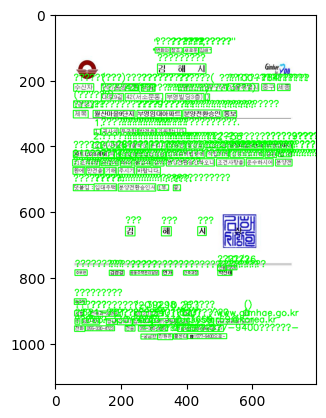

In [23]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

#Import image
base_dir = "/opt/ml/input/data/merged/train/"
image = cv2.imread(base_dir+f_name)
# bounding box 그리기
for i in range(len(box_list)):
    box_idx = box_list[i]
    anno = f1_words[box_idx]
    bbox = anno['points']
    txt = anno['transcription']
    cv2.rectangle(image, (bbox[0][0],bbox[0][1] ), (bbox[2][0],bbox[2][1] ), (0, 255, 0), 2)  # BGR 색상, 두께 2

    # 라벨 텍스트 설정
    label = txt

    # 라벨 삽입
    cv2.putText(image, txt, (bbox[0][0], bbox[0][1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

#Show the image with matplotlib
plt.imshow(image)
plt.show()